In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Cleaning Data & Exploratory data analysis

In [2]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
result = pd.read_csv('WorldCups.csv')

Matches dataset

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [3]:
# check & drop nan
matches.isna().sum()
matches.dropna(inplace = True)

In [4]:
# check duplicated 
matches[matches.duplicated()]
matches.drop_duplicates(inplace = True)

In [5]:
# Change datat type of Datetime column to Datetime and sort again.
matches['Datetime'] = pd.to_datetime(matches['Datetime'])
matches = matches.sort_values('Datetime').reset_index()

In [6]:
matches.shape

(835, 21)

Result dataset

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [7]:
# Change Germany FR > Germany for Winnner and Runners-up columns
result['Winner'] = result['Winner'].str.replace('Germany FR', 'Germany')
result['Runners-Up'] = result['Runners-Up'].str.replace('Germany FR', 'Germany')
result

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


Players dataset

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [ ]:
players.isna().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [ ]:
players[players.duplicated()]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37048,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,12,JULIO CESAR,GK,NaN
37049,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,1,C. BRAVO,GKC,NaN
37050,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,2,DANI ALVES,NaN,Y105'
37051,255951,300186487,CHI,SAMPAOLI Jorge (ARG),S,2,MENA,NaN,Y17'
37052,255951,300186487,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [8]:
players.drop_duplicates(inplace = True)

In [9]:
players.shape

(37048, 9)

## 1. Countries that win World cup the most

In [ ]:
result.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607


In [10]:
#Group by country and count the winner
winner = (result.groupby('Winner')[['Winner']].count()).rename(columns = {'Winner':'Winning count'}).reset_index().sort_values('Winning count', ascending = False)
winner = winner.rename(columns ={'Winner': 'Country'})
winner

,Country,Winning count
1,Brazil,5
4,Germany,4
5,Italy,4
0,Argentina,2
7,Uruguay,2
2,England,1
3,France,1
6,Spain,1


## Countries that had managed to the World cup's Final round the most

In [11]:
# Concate Winner column and Runners-up column together. Then group by Country and count
joining_final = pd.concat([result['Winner'], result['Runners-Up']]).reset_index().rename(columns = {0:'Country', 'index':'Joining final count'}).groupby('Country').count().reset_index().sort_values('Joining final count', ascending = False)
joining_final

,Country,Joining final count
5,Germany,8
1,Brazil,7
7,Italy,6
0,Argentina,5
8,Netherlands,3
2,Czechoslovakia,2
4,France,2
6,Hungary,2
11,Uruguay,2
3,England,1


In [12]:
# Merge the Winner and joining_final table, and calculate the Winning Ratio
final = pd.merge(winner, joining_final, how = 'outer', on = 'Country').fillna('0')
final['Winning Ratio'] = final['Winning count'].astype(int)/final['Joining final count']
final['Winning count'] = final['Winning count'].astype(int)
final

,Country,Winning count,Joining final count,Winning Ratio
0,Brazil,5,7,0.714286
1,Germany,4,8,0.500000
2,Italy,4,6,0.666667
3,Argentina,2,5,0.400000
4,Uruguay,2,2,1.000000
5,England,1,1,1.000000
6,France,1,2,0.500000
7,Spain,1,1,1.000000
8,Netherlands,0,3,0.000000
9,Czechoslovakia,0,2,0.000000


In [13]:
final['Losing count'] = final['Joining final count'] - final['Winning count']
final = final.sort_values('Joining final count', ascending=False)
a = final[['Country', 'Winning count', 'Losing count', 'Joining final count']]
a = a.sort_values('Joining final count', ascending = False)
b = a[['Country', 'Winning count', 'Losing count']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


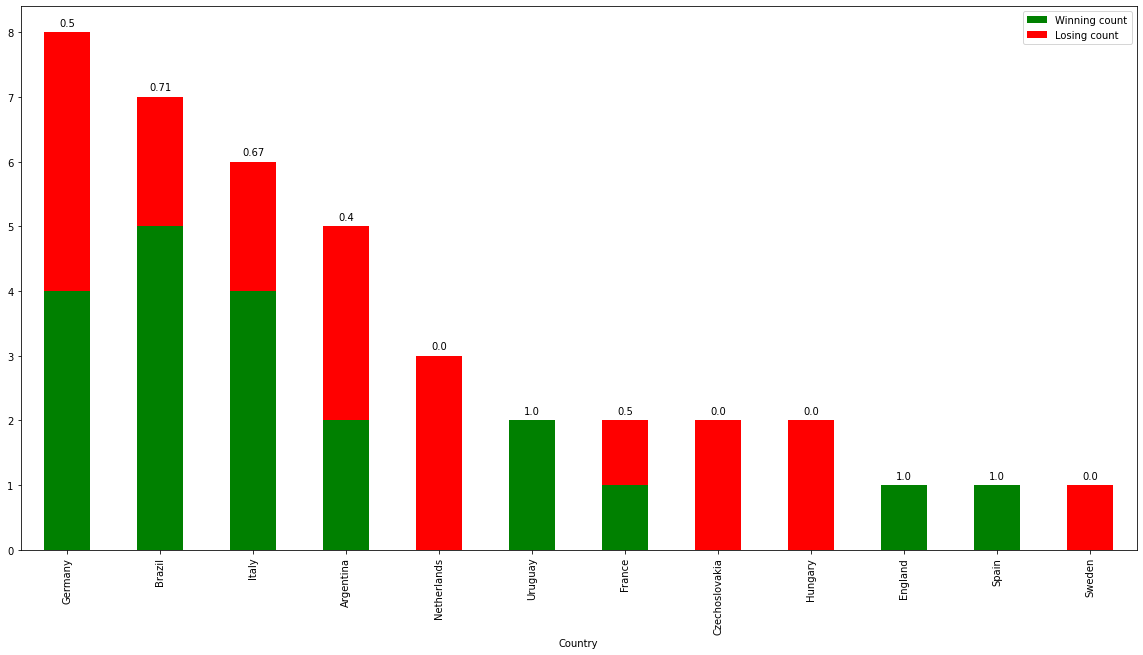

In [14]:
# Visualize Data
plt.figure(figsize = (20,10))
plt.subplot(111)
b.plot(ax = plt.subplot(111),kind='bar', stacked=True, color=['green', 'red'],x = 'Country')
plt.xlabel('Country')

for i in range(12):
  plt.text(x = i,
           y = final['Joining final count'].reset_index(drop = True)[i]+0.1,
           s = round(final['Winning Ratio'].reset_index(drop = True)[i],2),
           ha = 'center')
plt.show()

## Winning Rates of countries

In [15]:
# Drop unnecessary column
scorer = matches[['Year','Home Team Name',	'Home Team Goals','Home Team Initials','Away Team Goals', 'Away Team Name', 'Away Team Initials']]

In [16]:
# Correct the Country name
scorer['Home Team Name'] = scorer['Home Team Name'].str.replace('Germany FR', 'Germany')
scorer['Home Team Initials'] = scorer['Home Team Initials'].str.replace("FRG", "GER")
scorer['Home Team Name'] = scorer['Home Team Name'].str.replace('rn">', '')
scorer['Home Team Name'] = scorer['Home Team Name'].str.replace("IR Iran", "Iran")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [17]:
# Similar to Away team name
scorer['Away Team Name'] = scorer['Away Team Name'].str.replace('Germany FR', 'Germany')
scorer['Away Team Initials'] = scorer['Away Team Initials'].str.replace("FRG", "GER")
scorer['Away Team Name'] = scorer['Away Team Name'].str.replace('rn">', '')
scorer['Away Team Name'] = scorer['Away Team Name'].str.replace("IR Iran", "Iran")
scorer['Away Team Name'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Netherlands', 'Egypt', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia', 'Norway',
       'Dutch East Indies', 'Poland', 'Cuba', 'Italy', 'England',
       'Scotland', 'Turkey', 'Korea Republic', 'Uruguay', 'Wales',
       'Northern Ireland', 'Soviet Union', 'Colombia', 'Bulgaria',
       'Korea DPR', 'Portugal', 'Israel', 'Morocco', 'El Salvador',
       'Australia', 'Haiti', 'German DR', 'Zaire', 'Iran', 'Tunisia',
       'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait', 'Iraq',
       'Denmark', 'Canada', 'Republic of Ireland', 'United Arab Emirates',
       'Costa Rica', 'Russia', 'Saudi Arabia', 'Greece', 'Nigeria',
       'South Africa', 'Japan', 'Croatia', 'Jamaica', 'Senegal',
       'Slovenia', 'Ecuador', 'China PR', "C�te d'Ivoire",
       'Czech Republic', 'Ghana', 'Togo', 'Ukra

In [18]:
# split home team and away team & concat them again to group
ht = scorer[['Home Team Name', 'Home Team Initials','Home Team Goals']].rename(columns = {'Home Team Name': 'Country', 'Home Team Goals': 'Goals','Home Team Initials':'Team Initials'})
aw = scorer[['Away Team Name', 'Away Team Initials', 'Away Team Goals']].rename(columns = {'Away Team Name': 'Country', 'Away Team Goals': 'Goals','Away Team Initials':'Team Initials'})
cc = pd.concat([ht,aw])
cc

,Country,Team Initials,Goals
0,France,FRA,4.0
1,USA,USA,3.0
2,Yugoslavia,YUG,2.0
3,Romania,ROU,3.0
4,Argentina,ARG,1.0
...,...,...,...
830,Costa Rica,CRC,0.0
831,Germany,GER,7.0
832,Argentina,ARG,0.0
833,Netherlands,NED,3.0


In [19]:
tt_matches = cc.groupby(['Country','Team Initials'])[['Country',]].count().rename(columns = {'Country':'Total matches'})

In [20]:
#Total matches countries have played in world cup
tt_matches = tt_matches.reset_index().sort_values('Total matches', ascending = False)
tt_matches

,Country,Team Initials,Total matches
29,Germany,GER,105
8,Brazil,BRA,104
38,Italy,ITA,83
2,Argentina,ARG,77
26,England,ENG,62
...,...,...,...
37,Israel,ISR,3
39,Jamaica,JAM,3
1,Angola,ANG,3
80,Zaire,ZAI,3


In [21]:
#Function to find winner
def winner(row):
 if row['Home Team Goals'] > row['Away Team Goals']:
    return row['Home Team Name']
 elif row['Home Team Goals'] < row['Away Team Goals']:
    return row['Away Team Name']
 else:
    return 'Draw'

In [22]:
scorer['winner'] = scorer.apply(winner, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
# find winning matches
winning_count = scorer.groupby('winner')[['winner']].count().rename(columns = {'winner':'winning count'}).reset_index()

In [24]:
# rename to merge
winning_count = winning_count.rename(columns = {'winner':'Country'})
winning_count

,Country,winning count
0,Algeria,3
1,Argentina,42
2,Australia,2
3,Austria,12
4,Belgium,14
...,...,...
59,USA,8
60,Ukraine,2
61,Uruguay,20
62,Wales,1


In [25]:
tt_matches = pd.merge(tt_matches,winning_count,on = 'Country')
tt_matches['Winning rate'] = tt_matches['winning count']/tt_matches['Total matches']
tt_matches

,Country,Team Initials,Total matches,winning count,Winning rate
0,Germany,GER,105,65,0.619048
1,Brazil,BRA,104,70,0.673077
2,Italy,ITA,83,45,0.542169
3,Argentina,ARG,77,42,0.545455
4,England,ENG,62,26,0.419355
...,...,...,...,...,...
58,Bosnia and Herzegovina,BIH,3,1,0.333333
59,Serbia,SRB,3,1,0.333333
60,Cuba,CUB,3,1,0.333333
61,Czech Republic,CZE,3,1,0.333333


## Average goal per match

In [26]:
# group by country and sum the goals
leading_scorer = cc.groupby('Country')['Goals'].sum().reset_index()
leading_scorer['Number of matches'] = list(cc.groupby('Country')['Country'].count())
# Calculate AVG goal per match
leading_scorer['Average goals'] = leading_scorer['Goals']/leading_scorer['Number of matches']
leading_scorer = leading_scorer.sort_values('Average goals',ascending = False)
# Rank countries
leading_scorer['rank'] = leading_scorer['Average goals'].rank(ascending = False)
leading_scorer.sort_values('Number of matches',ascending = False).head(20)

,Country,Goals,Number of matches,Average goals,rank
29,Germany,222.0,105,2.114286,3.0
8,Brazil,221.0,104,2.125000,2.0
38,Italy,128.0,83,1.542169,16.0
2,Argentina,131.0,77,1.701299,8.0
26,England,79.0,62,1.274194,28.0
27,France,106.0,59,1.796610,5.0
67,Spain,92.0,59,1.559322,15.0
44,Mexico,57.0,53,1.075472,40.0
77,Uruguay,80.0,51,1.568627,14.0
46,Netherlands,86.0,50,1.720000,6.0


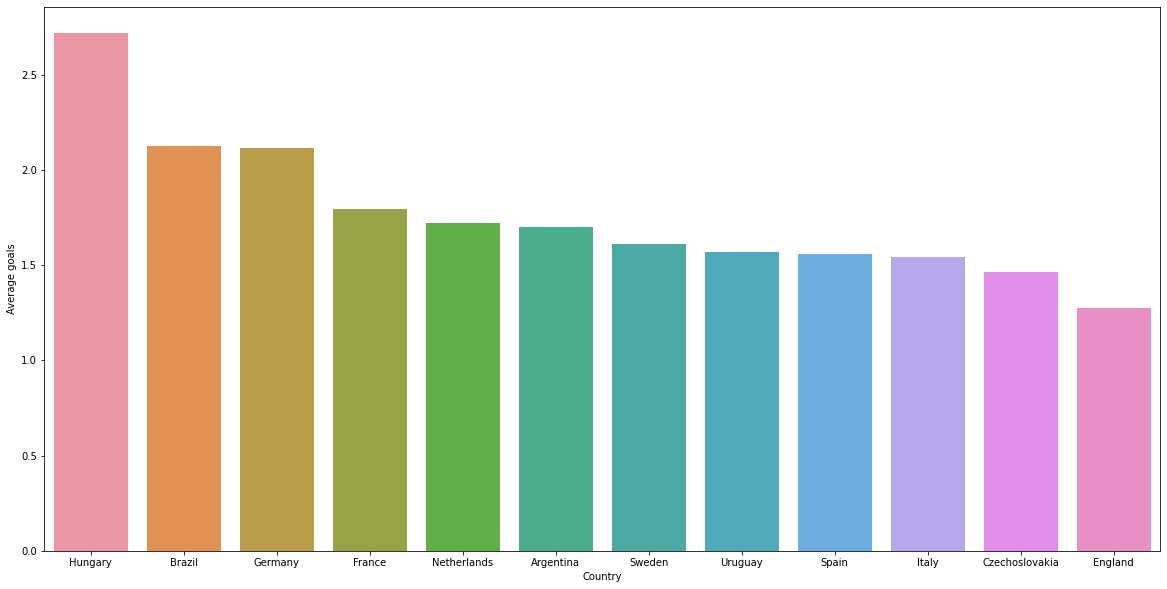

In [ ]:
# Visualize Data top 15 countries that has highest AVG goal per match
plt.figure(figsize = (20,10))
sns.barplot(data = leading_scorer, x= 'Country', y= 'Average goals')

## Average conceded goal per match

In [27]:
# Swaping the Goals of Home team and Away team. Because Home team goals is Away team conceded goals
ht_1 = ht.copy()
ht_1['Goals'] = aw['Goals']
ht_1.rename(columns = {'Goals' : 'Concede goal'})

,Country,Team Initials,Concede goal
0,France,FRA,1.0
1,USA,USA,0.0
2,Yugoslavia,YUG,1.0
3,Romania,ROU,1.0
4,Argentina,ARG,0.0
...,...,...,...
830,Netherlands,NED,0.0
831,Brazil,BRA,7.0
832,Netherlands,NED,0.0
833,Brazil,BRA,3.0


In [28]:
aw_1 = aw.copy()
aw_1['Goals'] = ht['Goals']
aw_1.rename(columns = {'Goals' : 'Concede goal'})

,Country,Team Initials,Concede goal
0,Mexico,MEX,4.0
1,Belgium,BEL,3.0
2,Brazil,BRA,2.0
3,Peru,PER,3.0
4,France,FRA,1.0
...,...,...,...
830,Costa Rica,CRC,0.0
831,Germany,GER,1.0
832,Argentina,ARG,0.0
833,Netherlands,NED,0.0


In [29]:
# Concate these two table and group by country
cc_1 = pd.concat([ht_1, aw_1])
cc_2 = cc_1.groupby('Country')['Goals'].sum().reset_index().rename(columns = {'Goals' : 'Concede Goals'})
cc_2

,Country,Concede Goals
0,Algeria,17.0
1,Angola,2.0
2,Argentina,84.0
3,Australia,26.0
4,Austria,47.0
...,...,...
76,United Arab Emirates,11.0
77,Uruguay,71.0
78,Wales,4.0
79,Yugoslavia,46.0


In [32]:
# Calculate Average conceded goals per match
cc_2['Number of matches'] = list(cc_1.groupby('Country')['Goals'].count())
cc_2['Average concede goals'] = cc_2['Concede Goals']/cc_2['Number of matches']
cc_2

,Country,Concede Goals,Number of matches,Average concede goals
0,Algeria,17.0,12,1.416667
1,Angola,2.0,3,0.666667
2,Argentina,84.0,77,1.090909
3,Australia,26.0,13,2.000000
4,Austria,47.0,29,1.620690
...,...,...,...,...
76,United Arab Emirates,11.0,3,3.666667
77,Uruguay,71.0,51,1.392157
78,Wales,4.0,5,0.800000
79,Yugoslavia,46.0,37,1.243243


In [33]:
# Ranking countries
cc_2 = cc_2.sort_values('Average concede goals')
cc_2['rank'] = cc_2['Average concede goals'].rank()
cc_2.sort_values('Number of matches', ascending = False).head(30)

,Country,Concede Goals,Number of matches,Average concede goals,rank
29,Germany,120.0,105,1.142857,18.0
8,Brazil,102.0,104,0.980769,8.0
38,Italy,77.0,83,0.927711,6.0
2,Argentina,84.0,77,1.090909,13.0
26,England,56.0,62,0.903226,5.0
27,France,71.0,59,1.203390,20.0
67,Spain,66.0,59,1.118644,17.0
44,Mexico,92.0,53,1.735849,52.0
77,Uruguay,71.0,51,1.392157,30.0
46,Netherlands,48.0,50,0.960000,7.0


## Average cards per match

In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 37047
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37048 non-null  int64 
 1   MatchID        37048 non-null  int64 
 2   Team Initials  37048 non-null  object
 3   Coach Name     37048 non-null  object
 4   Line-up        37048 non-null  object
 5   Shirt Number   37048 non-null  int64 
 6   Player Name    37048 non-null  object
 7   Position       4018 non-null   object
 8   Event          8823 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


In [35]:
# fill na value first
players['Event'].fillna('No', inplace = True)

In [42]:
# Sort out rows that have letters Y in the event column
cards = players[players['Event'].str.contains('Y')][['MatchID', 'Team Initials', 'Event']].reset_index(drop = True)

In [43]:
cards['Team Initials'] = cards['Team Initials'].str.replace('FRG', 'GER')
cards

,MatchID,Team Initials,Event
0,1186,BRA,Y1'
1,1447,ARG,Y1'
2,1596,BUL,Y1'
3,1596,BRA,Y1'
4,1596,BUL,Y1'
...,...,...,...
2131,300186503,ARG,G118' Y120'
2132,300186503,ARG,Y90' O105'
2133,300186503,SUI,I66' Y73'
2134,300186497,BEL,Y42'


In [44]:
# Write function to coun the cards
def y_card (row):
  import re
  a = re.findall(r'[Y]',row['Event'])
  return len(a)
cards['Count'] = cards.apply(y_card, axis =1)

In [45]:
cards = cards.groupby('Team Initials')[['Count']].sum()
cards

,Count
Team Initials,
ALG,20
ANG,12
ARG,114
AUS,27
AUT,23
...,...
URS,18
URU,63
USA,54


In [40]:
# Calculate AVG cards per match
tt_matches1 = tt_matches[['Country','Team Initials','Total matches']]
ycard_permatch = pd.merge(tt_matches1, cards, on ='Team Initials', how= 'inner')
ycard_permatch['Yellow cards per match'] = ycard_permatch['Count']/ycard_permatch['Total matches']

In [41]:
ycard_permatch = ycard_permatch.sort_values('Yellow cards per match')
ycard_permatch['rank'] = ycard_permatch['Yellow cards per match'].rank()
ycard_permatch.head(30)

,Country,Team Initials,Total matches,Count,Yellow cards per match,rank
16,Hungary,HUN,32,6,0.187500,1.0
51,Korea DPR,PRK,7,2,0.285714,2.0
19,Soviet Union,URS,31,18,0.580645,3.0
33,Peru,PER,15,9,0.600000,4.5
20,Czechoslovakia,TCH,30,18,0.600000,4.5
36,Northern Ireland,NIR,13,9,0.692308,6.0
25,Scotland,SCO,23,17,0.739130,7.0
12,Yugoslavia,YUG,37,28,0.756757,8.0
21,Austria,AUT,29,23,0.793103,9.0
4,England,ENG,62,51,0.822581,10.0


# Big question: Why Korea can not go far in the World cup?

## Asian countries performance in World Cup from 1938-2014

In [46]:
# Take needed columns
a = matches[['Year','Stage','Home Team Name','Home Team Goals','Away Team Goals', 'Away Team Name']]

In [47]:
# List the Asian countries attend WC from 1938-2014
asian = ['Korea DPR', 'Australia', 'Korea Republic', 'Iraq', 'United Arab Emirates', 'Saudi Arabia', 'Japan', 'China PR', 'Iran', 'Israel','Dutch East Indies','Kuwait']

In [50]:
# Rename the countries
a['Home Team Name'] = a['Home Team Name'].str.replace('IR Iran', 'Iran')
a['Home Team Name'] = a['Home Team Name'].str.replace('rn">', '')
a['Away Team Name'] = a['Away Team Name'].str.replace('IR Iran', 'Iran')
a['Away Team Name'] = a['Away Team Name'].str.replace('rn">', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [51]:
# Take all the matches that have an asian countries, either in Home Team or Away Team
a = a[(a['Home Team Name'].isin(asian)) | (a['Away Team Name'].isin(asian))]

In [52]:
a

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
38,1938.0,First round,Hungary,6.0,0.0,Dutch East Indies
81,1954.0,Group 2,Hungary,9.0,0.0,Korea Republic
88,1954.0,Group 2,Turkey,7.0,0.0,Korea Republic
170,1966.0,Group 4,Soviet Union,3.0,0.0,Korea DPR
179,1966.0,Group 4,Korea DPR,1.0,1.0,Chile
...,...,...,...,...,...,...
802,2014.0,Group H,Korea Republic,2.0,4.0,Algeria
804,2014.0,Group B,Australia,0.0,3.0,Spain
810,2014.0,Group C,Japan,1.0,4.0,Colombia
813,2014.0,Group F,Bosnia and Herzegovina,3.0,1.0,Iran


In [53]:
# Function the check the winner of one match
def winner(row):
 if row['Home Team Goals'] > row['Away Team Goals']:
    return row['Home Team Name']
 elif row['Home Team Goals'] < row['Away Team Goals']:
    return row['Away Team Name']
 else:
    return 'Draw'

In [54]:
a['winner'] = a.apply(winner, axis = 1)

In [55]:
a = a.reset_index(drop = True)

In [56]:
b = a[['Year','Stage', 'Home Team Name']].rename(columns =  {'Home Team Name':'Country'})
c = a[['Year','Stage', 'Away Team Name']].rename(columns =  {'Away Team Name':'Country'})
d = pd.concat([b,c])

In [57]:
d

,Year,Stage,Country
0,1938.0,First round,Hungary
1,1954.0,Group 2,Hungary
2,1954.0,Group 2,Turkey
3,1966.0,Group 4,Soviet Union
4,1966.0,Group 4,Korea DPR
...,...,...,...
103,2014.0,Group H,Algeria
104,2014.0,Group B,Spain
105,2014.0,Group C,Colombia
106,2014.0,Group F,Iran


In [59]:
e = d.groupby(['Country','Year']).count().reset_index()

In [60]:
f = e[e['Country'].isin(asian)]
g = f.groupby('Country')[['Year']].count().sort_values('Year', ascending = False)

In [61]:
g = g.rename(columns = {'Year':'Joining World cup count'})
g

,Joining World cup count
Country,
Korea Republic,9
Japan,5
Australia,4
Iran,4
Saudi Arabia,4
Korea DPR,2
China PR,1
Dutch East Indies,1
Iraq,1


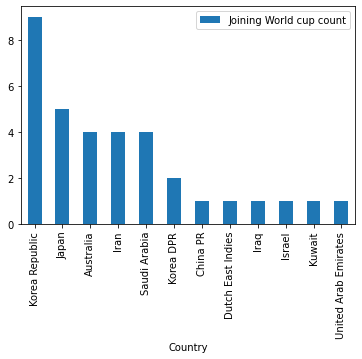

In [62]:
g.plot(kind = 'bar')

Note: Có 12 đội châu Á từng tham dự WC. Korea top 1 với 9 lần tham dự

## Furthest stage reached

In [64]:
d1 = d[d['Country'].isin(asian)]

In [65]:
# The stage name of each year were a little different
def adjust_stage(row):
  import re
  rs = re.sub(r'Group \w+\s*\w*|First round', 'Group stage',row['Stage'])
  return rs

In [66]:
d1['Stage'] = d1.apply(adjust_stage, axis = 1)
d1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Stage,Country
4,1966.0,Group stage,Korea DPR
5,1966.0,Group stage,Korea DPR
11,1974.0,Group stage,Australia
12,1974.0,Group stage,Australia
21,1986.0,Group stage,Korea Republic
...,...,...,...
96,2014.0,Group stage,Australia
97,2014.0,Group stage,Japan
99,2014.0,Group stage,Korea Republic
102,2014.0,Group stage,Iran


In [67]:
d1['Stage']= d1['Stage'].str.replace('Third place', 'Semi-finals')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
d1.drop(d1[d1['Stage']=='Third place'].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
d1.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [70]:
d1['Stage'].value_counts()

Group stage       34
Round of 16        6
Quarter-finals     2
Semi-finals        1
Name: Stage, dtype: int64

In [71]:
d1

,Year,Stage,Country
4,1966.0,Group stage,Korea DPR
11,1974.0,Group stage,Australia
21,1986.0,Group stage,Korea Republic
22,1986.0,Group stage,Iraq
25,1990.0,Group stage,United Arab Emirates
28,1990.0,Group stage,Korea Republic
33,1994.0,Group stage,Korea Republic
34,1994.0,Group stage,Saudi Arabia
37,1994.0,Round of 16,Saudi Arabia
38,1998.0,Group stage,Saudi Arabia


In [72]:
d2 = d1.groupby(['Stage','Country']).count().rename(columns = {'Year':'Count'})

In [73]:
d2 = d2.reset_index()

In [74]:
d2

,Stage,Country,Count
0,Group stage,Australia,4
1,Group stage,China PR,1
2,Group stage,Dutch East Indies,1
3,Group stage,Iran,4
4,Group stage,Iraq,1
5,Group stage,Israel,1
6,Group stage,Japan,5
7,Group stage,Korea DPR,2
8,Group stage,Korea Republic,9
9,Group stage,Kuwait,1


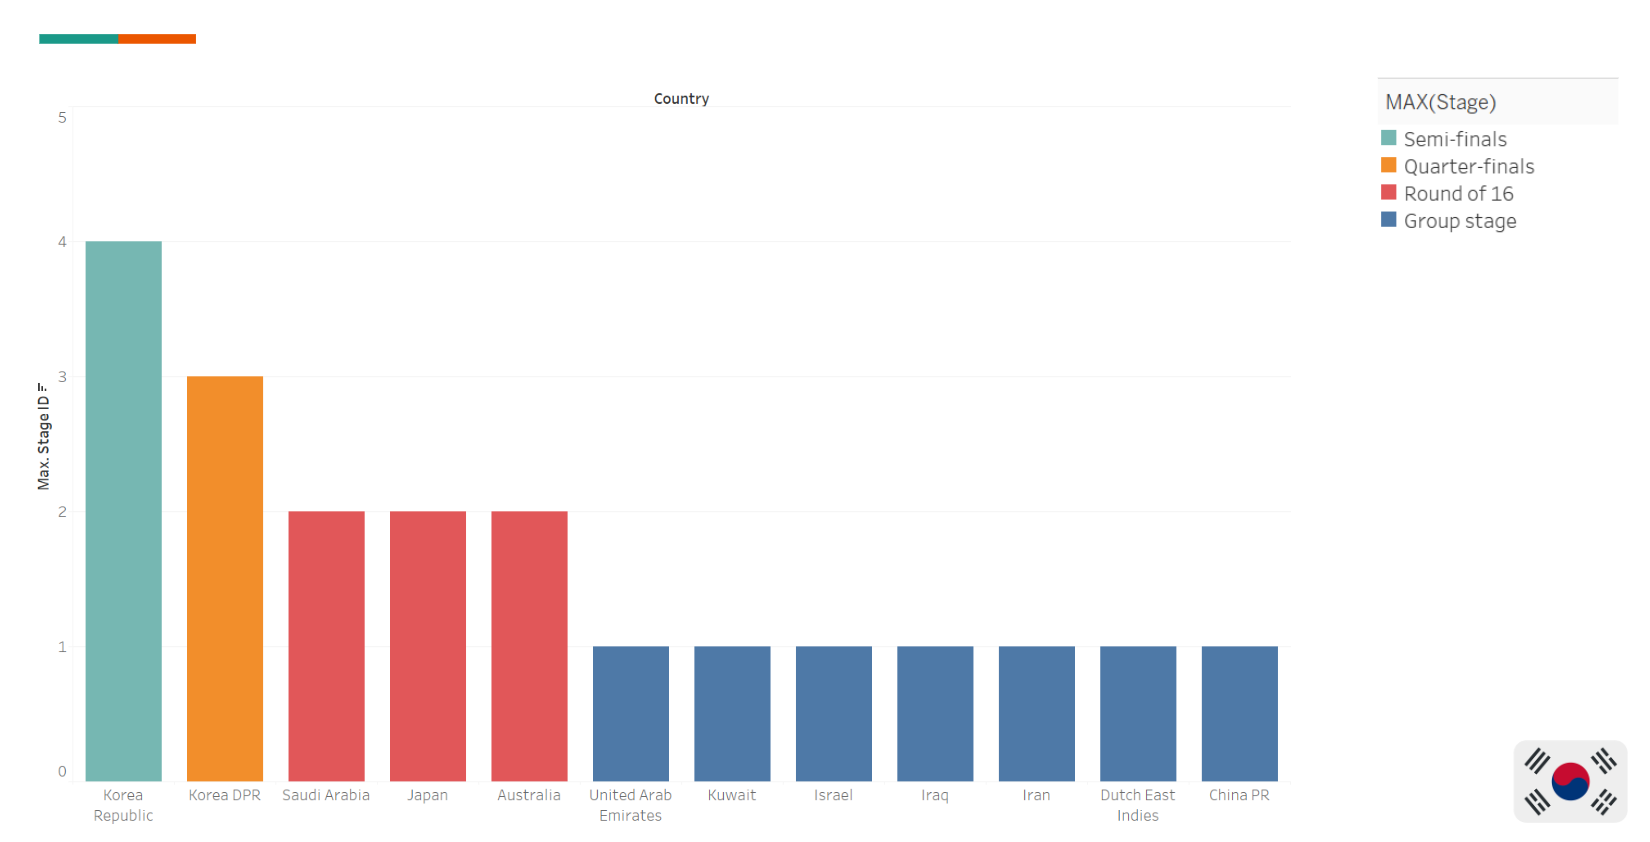

Note:
- Group stage: 12 đội châu Á. Có 8/12 đội chưa từng vượt qua vòng loại
- Round of 16: 4 đội châu Á
- Quarter-finals: 2 đội Nam hàn và Bắc Hàn
- Semi-finals: Duy nhất Korea

## Winning rate of Asian countries

In [75]:
tt_matches[tt_matches['Country'].isin(asian)]

,Country,Team Initials,Total matches,winning count,Winning rate
17,Korea Republic,KOR,31,5,0.161290
30,Japan,JPN,17,4,0.235294
37,Australia,AUS,13,2,0.153846
39,Saudi Arabia,KSA,13,2,0.153846
42,Iran,IRN,12,1,0.083333
51,Korea DPR,PRK,7,1,0.142857


Note: 
- Trong số 12 nước từng tham dự WC, 6 Nước đã từng chiến thắng tại ít nhất 1 trận tại WC, 6 nước còn lại chưa thắng trận nào

- Korea có tổng số trận thi đấu tại WC nhiều thứ 17, cao ngang 1 số nước đã từng vô đến trận chung kết như Hungary hay CH Séc

- Xếp hạng 1 về số trận thắng và xếp hạng 2 về tỉ lệ chiến thắng tại châu Á

# Korea team analysis

In [76]:
# Take out the matches that has Korean team in matches table and save it for further analysis
kor =  matches[(matches['Home Team Initials'] == 'KOR') | (matches['Away Team Initials'] == 'KOR')][['Year', 'Stage', 'Stadium', 'City', 'Home Team Name', 'Home Team Goals', 'Away Team Goals','Away Team Name', 'Win conditions','MatchID']]
kor['Winner'] = kor.apply(winner,axis =1)

## Goal distribution

In [77]:
# Take out the mathces that has Korea in players to investigate the Event columns
# ex: 'G12' means there were a goal scored at minute 12th
players1 = players[players['Team Initials']  == 'KOR']
players1 = players1[['MatchID','Coach Name', 'Player Name', 'Event']]
players1

,MatchID,Coach Name,Player Name,Event
3290,1294,KIM Yong Shik (KOR),HONG Dook Jong,No
3292,1294,KIM Yong Shik (KOR),PARK Kyu Chong,No
3294,1294,KIM Yong Shik (KOR),PARK Yae Seung,No
3296,1294,KIM Yong Shik (KOR),KANG Chang Gi,No
3298,1294,KIM Yong Shik (KOR),MIN Byung Dae,No
...,...,...,...,...
36256,300186480,HONG Myungbo (KOR),C Y PARK,No
36258,300186480,HONG Myungbo (KOR),K H LEE,IH46'
36260,300186480,HONG Myungbo (KOR),J W PARK,No
36262,300186480,HONG Myungbo (KOR),D W JI,I73'


In [78]:
players1['Event'].fillna('blank', inplace = True)

In [90]:
# Only take the rows that contains letter 'G'
players2 = players1[players1['Event'].str.contains(r'[G]')]
players2

,MatchID,Coach Name,Player Name,Event
15774,395,KIM Jung Nam (KOR),PARK Chang Sun,Y50' G73'
16233,460,KIM Jung Nam (KOR),KIM Jong Boo,IH46' G70'
16743,643,KIM Jung Nam (KOR),CHOI Soon Ho,G62'
16751,643,KIM Jung Nam (KOR),HUH Jungmoo,G83'
18855,175,LEE Hoe Taik (KOR),HWANG Bo Kwan,G43' Y68'
20191,3050,KIM Ho Kon (KOR),M B HONG,G85'
20201,3050,KIM Ho Kon (KOR),J W SEO,I59' G90'
21333,3076,KIM Ho Kon (KOR),S H HWANG,G52'
21335,3076,KIM Ho Kon (KOR),M B HONG,G63'
22828,8732,CHA Bum Kun (KOR),HA S. J.,G27' R30'


In [91]:
# Function to return the number of goal
def goal(row):
  import re
  a = re.findall(r'[^(MP\w+)]*[G]',row['Event'])
  return len(a)

In [92]:
players2['Goal'] = players2.apply(goal, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
players2 = players2.reset_index()
players2

,index,MatchID,Coach Name,Player Name,Event,Goal
0,15774,395,KIM Jung Nam (KOR),PARK Chang Sun,Y50' G73',1
1,16233,460,KIM Jung Nam (KOR),KIM Jong Boo,IH46' G70',1
2,16743,643,KIM Jung Nam (KOR),CHOI Soon Ho,G62',1
3,16751,643,KIM Jung Nam (KOR),HUH Jungmoo,G83',1
4,18855,175,LEE Hoe Taik (KOR),HWANG Bo Kwan,G43' Y68',1
5,20191,3050,KIM Ho Kon (KOR),M B HONG,G85',1
6,20201,3050,KIM Ho Kon (KOR),J W SEO,I59' G90',1
7,21333,3076,KIM Ho Kon (KOR),S H HWANG,G52',1
8,21335,3076,KIM Ho Kon (KOR),M B HONG,G63',1
9,22828,8732,CHA Bum Kun (KOR),HA S. J.,G27' R30',1


In [94]:
# Function to return minutre
def minute(row):
  import re
  a = re.findall(r'[G](\d*)',row['Event'])
  return int(a[0])

In [95]:
players2['minute'] = players2.apply(minute,axis = 1)

In [96]:
# Now we have separated Goal and the minute (of that goal) into two different columns
players2

,index,MatchID,Coach Name,Player Name,Event,Goal,minute
0,15774,395,KIM Jung Nam (KOR),PARK Chang Sun,Y50' G73',1,73
1,16233,460,KIM Jung Nam (KOR),KIM Jong Boo,IH46' G70',1,70
2,16743,643,KIM Jung Nam (KOR),CHOI Soon Ho,G62',1,62
3,16751,643,KIM Jung Nam (KOR),HUH Jungmoo,G83',1,83
4,18855,175,LEE Hoe Taik (KOR),HWANG Bo Kwan,G43' Y68',1,43
5,20191,3050,KIM Ho Kon (KOR),M B HONG,G85',1,85
6,20201,3050,KIM Ho Kon (KOR),J W SEO,I59' G90',1,90
7,21333,3076,KIM Ho Kon (KOR),S H HWANG,G52',1,52
8,21335,3076,KIM Ho Kon (KOR),M B HONG,G63',1,63
9,22828,8732,CHA Bum Kun (KOR),HA S. J.,G27' R30',1,27


In [97]:
players3 = players2[['Goal','minute']]
players3 = players3.reset_index(drop = True)
players3

,Goal,minute
0,1,73
1,1,70
2,1,62
3,1,83
4,1,43
5,1,85
6,1,90
7,1,52
8,1,63
9,1,27


In [98]:
players3['Goal'].sum()

31

### Chart

([<matplotlib.axis.XTick at 0x7fd80c0f6290>,
 <a list of 19 Text major ticklabel objects>)

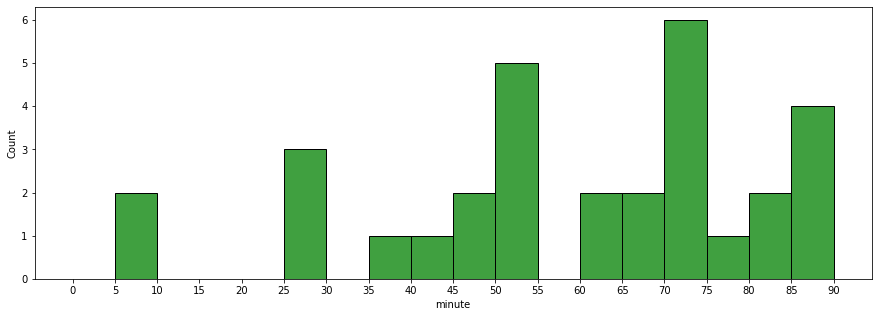

In [ ]:
# Use histogram to visualize distribution of goal, each bin equals 5 minutes
plt.figure(figsize = (15,5))
sns.histplot(data = players3, x = 'minute', binwidth = 5, binrange=(0,90),color = 'green')
plt.xticks(ticks=list(range(0,91,5)))

Note:
- HQ tấn công không quá mạnh, ghi 31 bàn trong 31 trận, trung bình 1 bàn mỗi trận, xếp hạng 44 thế giới về số bàn thắng TB/trận
- 77,5% số bàn được khi trong hiệp 2, đặc biệt từ khoảng giữa hiệp 2 (p68-72)

> nhập cuộc chậm hơn đối thủ, thường bị dồn ép trong suốt hiệp 1 và kéo sang đầu hiệp 2.

## Conceced goal distribution

In [99]:
# Take the list of matchID of matches that has Korea from players1
kor_matches = list(players1['MatchID'].unique())

In [103]:
# Now use the list of matchID and only keep the away team, their goals will be Korea's conceded goals
k_enemy =  players[players['MatchID'].isin(kor_matches) & (players['Team Initials'] != 'KOR')]
k_enemy.head(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
3289,211,1294,HUN,SEBES Gusztav (HUN),S,1,Gyula GROSICS,GK,No
3291,211,1294,HUN,SEBES Gusztav (HUN),S,2,Jeno BUZANSZKY,NaN,No
3293,211,1294,HUN,SEBES Gusztav (HUN),S,3,Gyula LORANT,NaN,No
3295,211,1294,HUN,SEBES Gusztav (HUN),S,4,Mihaly LANTOS,NaN,G18'
3297,211,1294,HUN,SEBES Gusztav (HUN),S,5,Jozsef BOZSIK,NaN,No


In [104]:
k_enemy['Event'].fillna('blank', inplace = True)
# Filter rows that Event columns contains letter G (goal) or P (penalty)
k_enemy = k_enemy[k_enemy['Event'].str.contains('[GP]')]

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [105]:
k_enemy_goal = k_enemy[['MatchID','Player Name','Event']]
k_enemy_goal

,MatchID,Player Name,Event
3295,1294,Mihaly LANTOS,G18'
3299,1294,Sandor KOCSIS,G24' G36' G50'
3301,1294,Ferenc PUSKAS,G12' G89'
3303,1294,Zoltan CZIBOR,G59'
3309,1294,Peter PALOTAS,G75' G83'
3651,1304,Erol KESKIN,G76'
3653,1304,Suat MAMAT,G10' G30'
3657,1304,Buhran SARGUN,G37' G64' G70'
3659,1304,Lefter KUCUKANDONYADIS,G18'
15777,395,Jorge VALDANO,G6' G46'


In [106]:
# Function to extract Total goal and minute 
def goal1(row):
  import re
  a = re.findall(r'[GP]',row['Event'])
  return len(a)

def minute1(row):
  import re
  a = re.findall(r'[GP](\d*)',row['Event'])
  return a

In [107]:
k_enemy_goal['Goal'] = k_enemy_goal.apply(goal1, axis = 1)
k_enemy_goal['minute'] = k_enemy_goal.apply(minute1, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
# The minute column is not usable, we need to further extract each the minute in to separate columns
k_enemy_goal

,MatchID,Player Name,Event,Goal,minute
3295,1294,Mihaly LANTOS,G18',1,[18]
3299,1294,Sandor KOCSIS,G24' G36' G50',3,"[24, 36, 50]"
3301,1294,Ferenc PUSKAS,G12' G89',2,"[12, 89]"
3303,1294,Zoltan CZIBOR,G59',1,[59]
3309,1294,Peter PALOTAS,G75' G83',2,"[75, 83]"
3651,1304,Erol KESKIN,G76',1,[76]
3653,1304,Suat MAMAT,G10' G30',2,"[10, 30]"
3657,1304,Buhran SARGUN,G37' G64' G70',3,"[37, 64, 70]"
3659,1304,Lefter KUCUKANDONYADIS,G18',1,[18]
15777,395,Jorge VALDANO,G6' G46',2,"[6, 46]"


In [111]:
# Because one Korean players can only score maximum 3 goals in a match, so we need 3 function
def minute_first_goal(row):
  return int(row['minute'][0])
k_enemy_goal['minute_first_goal'] = k_enemy_goal.apply(minute_first_goal, axis =1 )

def minute_second_goal(row):
  if row['Goal'] >= 2:
    return int(row['minute'][1])
k_enemy_goal['minute_second_goal'] = k_enemy_goal.apply(minute_second_goal, axis =1 )

def minute_third_goal(row):
  if row['Goal'] == 3:
    return int(row['minute'][2])
k_enemy_goal['minute_third_goal'] = k_enemy_goal.apply(minute_third_goal, axis =1 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [110]:
k_enemy_goal

,MatchID,Player Name,Event,Goal,minute,minute_first_goal,minute_second_goal,minute_third_goal
3295,1294,Mihaly LANTOS,G18',1,[18],18,NaN,NaN
3299,1294,Sandor KOCSIS,G24' G36' G50',3,"[24, 36, 50]",24,36.0,50.0
3301,1294,Ferenc PUSKAS,G12' G89',2,"[12, 89]",12,89.0,NaN
3303,1294,Zoltan CZIBOR,G59',1,[59],59,NaN,NaN
3309,1294,Peter PALOTAS,G75' G83',2,"[75, 83]",75,83.0,NaN
3651,1304,Erol KESKIN,G76',1,[76],76,NaN,NaN
3653,1304,Suat MAMAT,G10' G30',2,"[10, 30]",10,30.0,NaN
3657,1304,Buhran SARGUN,G37' G64' G70',3,"[37, 64, 70]",37,64.0,70.0
3659,1304,Lefter KUCUKANDONYADIS,G18',1,[18],18,NaN,NaN
15777,395,Jorge VALDANO,G6' G46',2,"[6, 46]",6,46.0,NaN


In [112]:
# Rename the column and merge 3 minutes column together
fg = k_enemy_goal[['MatchID','minute_first_goal']].rename(columns = {'minute_first_goal':'minute'})
sg = k_enemy_goal[['MatchID','minute_second_goal']].rename(columns = {'minute_second_goal':'minute'})
tg = k_enemy_goal[['MatchID','minute_third_goal']].rename(columns = {'minute_third_goal':'minute'})
concat1 = pd.concat([fg,sg,tg])

In [113]:
concat1

,MatchID,minute
3295,1294,18.0
3299,1294,24.0
3301,1294,12.0
3303,1294,59.0
3309,1294,75.0
...,...,...
35489,300186495,NaN
35495,300186495,NaN
35499,300186495,NaN
35503,300186495,NaN


### Chart

In [114]:
# Drop the NA value and create new goal colums with value = 1
concat1.dropna(inplace = True)
concat1['Goal'] = 1
concat1= concat1.reset_index(drop = True)

In [117]:
concat1

,MatchID,minute,Goal
0,1294,18.0,1
1,1294,24.0,1
2,1294,12.0,1
3,1294,59.0,1
4,1294,75.0,1
...,...,...,...
60,300061504,80.0,1
61,1294,50.0,1
62,1304,70.0,1
63,175,81.0,1


([<matplotlib.axis.XTick at 0x7f33cf461d10>,
 <a list of 19 Text major ticklabel objects>)

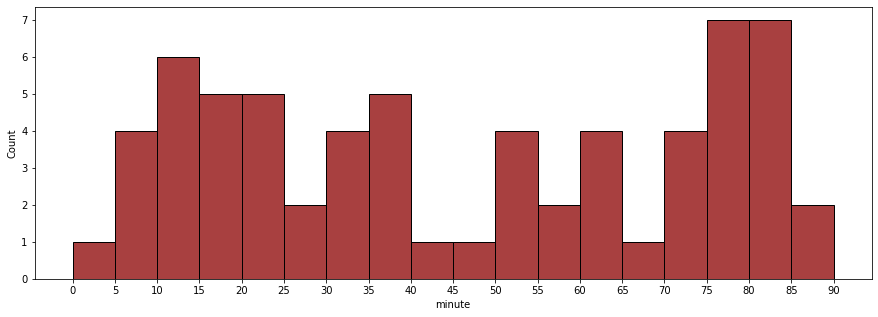

In [116]:
#Visualize
plt.figure(figsize = (15,5))
sns.histplot(data = concat1[['minute','Goal']], x = 'minute', binwidth = 5, binrange=(0,90), color = 'darkred')
plt.xticks(ticks=list(range(0,91,5)))

HQ tấn công k tốt nhưng phòng thủ còn tệ hơn. Số bàn thua cao gấp đôi số bàn ghi dc. Thủng lưới 65 bàn trong 31 trận, TB 2 bàn/ trận
- Thùng lưới rất sớm từ phút đầu tiên
- 1/3 số bàn thua đến từ 25 phút đầu. Đặc biệt (10-25p) > thủng lưới tăng đột biến > Hàng thủ chơi kém tập trung, nhập cuộc rất chậm
- Về Gần cuối hiệp 1 (30-40p) thủng lưới cũng tăng > Đuối sức về cuối hiệp, sức bền k bằng các đối thủ khác
- Giữa và về cuối hiệp 2 số bàn tăng cao kỉ lục > phòng thủ đuối hẳn

> Hàng thủ cần chơi tập trung hơn vào 25p đầu và 25p cuối trận. Đây là những thời điểm rất nhạy cảm, có thể tạo ra bước ngoặt lớn cho trận đấu

## Cards distribution

In [118]:
# Extract the event rows with letter 'Y' (yellow cards)
kor_ycard =  players1[players1['Event'].str.contains('Y')]

In [119]:
kor_ycard

,MatchID,Coach Name,Player Name,Event
15774,395,KIM Jung Nam (KOR),PARK Chang Sun,Y50' G73'
15784,395,KIM Jung Nam (KOR),HUH Jungmoo,Y44'
16213,460,KIM Jung Nam (KOR),CHO Young Jeung,Y60'
16221,460,KIM Jung Nam (KOR),KIM Joo Sung,Y31'
16735,643,KIM Jung Nam (KOR),PARK Kyung Hoon,Y35'
...,...,...,...,...
34853,300186499,HONG Myungbo (KOR),J C KOO,Y90'
34857,300186499,HONG Myungbo (KOR),S Y KI,Y30'
35494,300186495,HONG Myungbo (KOR),Y LEE,Y54'
35498,300186495,HONG Myungbo (KOR),K Y HAN,Y69' O78'


In [120]:
def y_card (row):
  import re
  a = re.findall(r'[Y]',row['Event'])
  return len(a)
kor_ycard['Count'] = kor_ycard.apply(y_card, axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [121]:
def minute_y(row):
  import re
  a = re.findall(r'[Y](\d*)',row['Event'])
  return int(a[0])
kor_ycard['minute'] = kor_ycard.apply(minute_y, axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [122]:
kor_ycard

,MatchID,Coach Name,Player Name,Event,Count,minute
15774,395,KIM Jung Nam (KOR),PARK Chang Sun,Y50' G73',1,50
15784,395,KIM Jung Nam (KOR),HUH Jungmoo,Y44',1,44
16213,460,KIM Jung Nam (KOR),CHO Young Jeung,Y60',1,60
16221,460,KIM Jung Nam (KOR),KIM Joo Sung,Y31',1,31
16735,643,KIM Jung Nam (KOR),PARK Kyung Hoon,Y35',1,35
...,...,...,...,...,...,...
34853,300186499,HONG Myungbo (KOR),J C KOO,Y90',1,90
34857,300186499,HONG Myungbo (KOR),S Y KI,Y30',1,30
35494,300186495,HONG Myungbo (KOR),Y LEE,Y54',1,54
35498,300186495,HONG Myungbo (KOR),K Y HAN,Y69' O78',1,69


In [125]:
yc = kor_ycard[['Count', 'minute']]
yc

,Count,minute
15774,1,50
15784,1,44
16213,1,60
16221,1,31
16735,1,35
...,...,...
34853,1,90
34857,1,30
35494,1,54
35498,1,69


In [126]:
# Count the yellow cards by each math
kycard_permatch = kor_ycard.groupby('MatchID')[['Count']].sum().reset_index()

In [127]:
kycard_permatch

,MatchID,Count
0,57,1
1,175,3
2,290,2
3,395,2
4,460,2
5,643,3
6,3050,2
7,3065,3
8,3076,1
9,8732,1


In [130]:
kor_winning_ID = list(kor[kor['Winner'] == 'Korea Republic']['MatchID'])
kor_winning_ID

[43950014.0, 43950047.0, 43950056.0, 97410014.0, 300061459.0]

In [128]:
kor_rcard =  players1[players1['Event'].str.contains('R')]
kor_rcard

,MatchID,Coach Name,Player Name,Event
19292,290,LEE Hoe Taik (KOR),YOON Deok Yeo,R70'
22828,8732,CHA Bum Kun (KOR),HA S. J.,G27' R30'


### Chart

([<matplotlib.axis.XTick at 0x7f33cf424ad0>,
 <a list of 19 Text major ticklabel objects>)

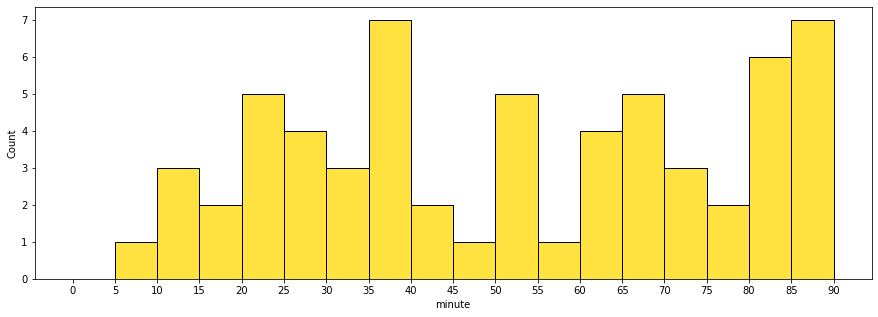

In [129]:
plt.figure(figsize = (15,5))
sns.histplot(data = yc, x = 'minute', binwidth = 5, binrange=(0,90), color = 'gold')
plt.xticks(ticks=list(range(0,91,5)))

Note:
- Nhận thẻ vàng rất nhiều,TB gần 2 thẻ/ trận.
Tăng cao ở giữa-cuối hiệp 1 (30-40P)
Tăng đột biến ở giai đoạn hiệp 2, cụ thể là sau phút 68p
Đạt đỉnh ở phút 90 (từng nhận 5 thẻ)

> Rất vất vả để cản đối phương ghi bàn vào vào cuối hiệp 2 dẫn đến phạm lỗi nhiều. Tuy nhiên, phạm lỗi nhiều có thể dẫn đến những tình huống phạt cố định nguy hiểm ngay trước khung thành > tăng khả năng khi bàn của đối phương > và kết quả số bàn thua cũng tăng đột biến vào giai đoạn này

## Successful Penalty rate

In [131]:
# function to extract event row with letter 'M' (miss penalty)
def miss_pen(row):
  z = re.findall(r'[M]',row['Event'])
  return len(z)
  
# function to calculate success penalty rate
def success_pen_rate(country):
  x = (players[players['Team Initials'] == country])
  x['Event'].fillna('blank',inplace = True)
  x = x[x['Event'].str.contains('P|MP')]
  
  x['MP'] = x.apply(miss_pen,axis = 1)

  return (x.shape[0] - x['MP'].sum())/x.shape[0]

In [132]:
lst = ['KOR','BRA','GER','ITA','ARG','FRA','ESP']
emp = {}
for i in lst:
  emp[i] = success_pen_rate(i)
emp

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


{'KOR': 0.0,
 'BRA': 1.0,
 'GER': 0.6666666666666666,
 'ITA': 1.0,
 'ARG': 0.8888888888888888,
 'FRA': 0.9090909090909091,
 'ESP': 0.8823529411764706}

### Chart

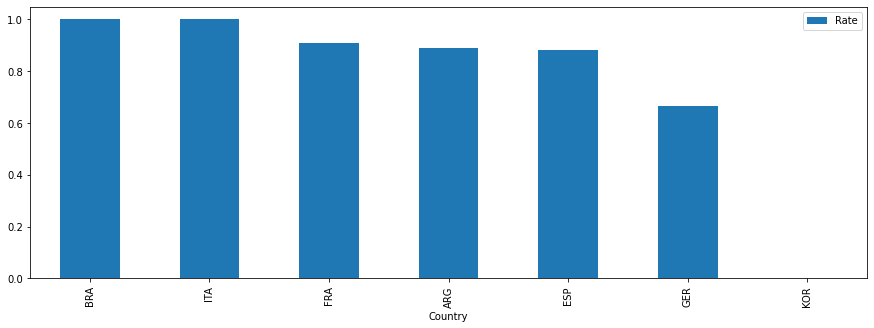

In [133]:
df1 = pd.DataFrame({'Country': list(emp.keys()),
              'Rate': list(emp.values())})
df1 = df1.sort_values('Rate', ascending = False).set_index('Country')
df1.plot(kind = 'bar', figsize = (15,5))

Note: Tỷ lệ sút penalty thành công của HQ tại là 0% > HQ chưa tận dụng cơ hội để chuyển quả penalty trực tiếp thành bàn.

Các đội bóng mạnh đền có tỉ lệ sút thành công penalty rất cao ~70%-80% hoặc thậm chí là 100%

> HQ cần phải cải thiện rất nhiều về kỹ năng và tâm lý cho các cầu thủ về khoản sút phạt